<a href="https://colab.research.google.com/github/Auta01/Tensorflow-cases/blob/main/Building%20neural%20network%20model%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Depencies

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Read the insurance datasets
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
#Hot encoding
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [13]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [14]:
#create  X and y values (features and labels)
x = insurance_one_hot.drop('charges', axis =1)
y= insurance_one_hot['charges']

In [15]:
x.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [16]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [18]:
#creating training and test set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [21]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [41]:
#create a neural network model
# set a random seed

#1 . Create a model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.SGD(),
                          metrics =['mae'])

 #3. Fitting the model
insurance_model.fit(x_train, y_train ,epochs=50)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3400.1257 - mae: 3400.1257
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3787.6316 - mae: 3787.6316
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3374.3003 - mae: 3374.3003
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3704.0908 - mae: 3704.0908
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3533.9531 - mae: 3533.9531
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3407.7295 - mae: 3407.7295
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3734.9514 - mae: 3734.9514
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3874.2568 - mae: 3874.2568
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3447.2009 - mae: 3447.2009
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3629.0330 - mae: 3629.0330
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3530.7075 - mae: 3530.7075
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3517

In [42]:
#check the result of the insurance model onthe test data
insurance_model_1.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13462.7021 - mae: 13462.7021


[13006.0791015625, 13006.0791015625]

In [30]:
y_train.median() ,y_train.mean()

(9575.4421, np.float64(13346.089736364485))

it looks like the model isn't performing too well so i will improve our model down below


In [44]:
# improve our model
#set a random seed
 #1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_2.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics =['mae'])
#3. Fit the  model

insurance_model_2.fit(x_train,y_train, epochs =100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12357.1904 - mae: 12357.1904
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7462.6621 - mae: 7462.6621
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7877.2212 - mae: 7877.2212
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7079.4751 - mae: 7079.4751
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7278.2227 - mae: 7278.2227
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7350.2690 - mae: 7350.2690
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6206.4409 - mae: 6206.4409
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6326.7275 - mae: 6326.7275
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5614.3242 - mae: 5614.3242
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6048.4844 - mae: 6048.4844
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5687.3242 - mae: 5687.3242
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [45]:
insurance_model_2.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3231.5591 - mae: 3231.5591  


[3186.4326171875, 3186.4326171875]

In [48]:
#set random seed
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer =tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=['mae'])

history=insurance_model_3.fit(x_train, y_train ,epochs =200, verbose =1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12886.2793 - mae: 12886.2793
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13037.5244 - mae: 13037.5244
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12803.3887 - mae: 12803.3887
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12563.2305 - mae: 12563.2305
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11379.0869 - mae: 11379.0869
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10214.5537 - mae: 10214.5537
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8890.0781 - mae: 8890.0781
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7575.8955 - mae: 7575.8955
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6961.6655 - mae: 6961.6655
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7280.3511 - mae: 7280.3511
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7790.2002 - mae: 7790.2002
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [47]:
insurance_model_3.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3566.5098 - mae: 3566.5098  


[3493.32861328125, 3493.32861328125]

In [52]:
#set random seed
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer =tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=['mae'])

history=insurance_model_4.fit(x_train, y_train ,epochs =500, verbose =1)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13344.6006 - mae: 13344.6006
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12752.6426 - mae: 12752.6426
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12737.4785 - mae: 12737.4785
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11855.6787 - mae: 11855.6787
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11064.5674 - mae: 11064.5674
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9651.3779 - mae: 9651.3779
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8032.1567 - mae: 8032.1567
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7644.4771 - mae: 7644.4771
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7530.5889 - mae: 7530.5889
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7720.6997 - mae: 7720.6997
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7243.4331 - mae: 7243.4331
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [55]:
insurance_model_4.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3209.1091 - mae: 3209.1091  


[3158.239013671875, 3158.239013671875]

Text(0.5, 0, 'epochs')

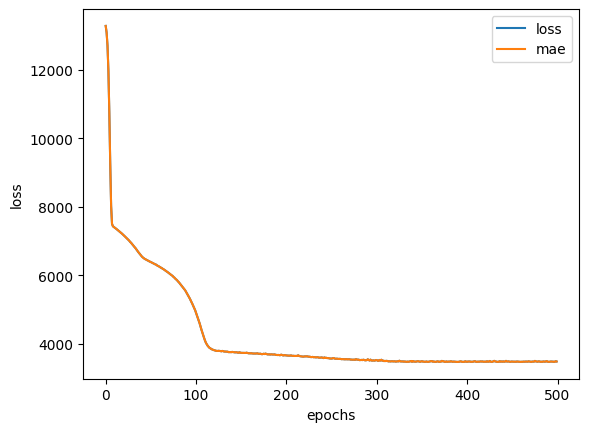

In [56]:
# plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


Preprocessing Our Data

In [57]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

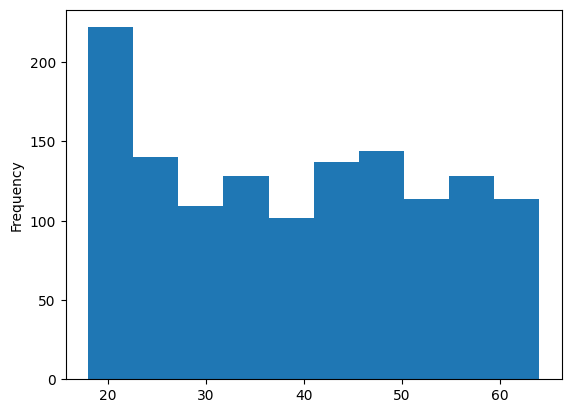

In [58]:
x['age'].plot(kind='hist')

In [60]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [59]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder

In [62]:
#Create a column transfomer

ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
    )

#create x and y
x = insurance.drop('charges', axis=1)

y = insurance['charges']

#build our train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#fit the column transformer to our training data
ct.fit(x_train)

#Transforming train and test data

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)





In [63]:
# what does our data look like
x_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [65]:
x_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [66]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

Beautiful our data has been normalized and one hot encoded

In [71]:
#Build a neural network model to fit on our normalized data
#set a random seed

tf.random.set_seed(42)

#1. Create a model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics= ['mae'])

#3. Fit the model
insurance_model_5.fit(x_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13297.1406 - mae: 13297.1406
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13288.8633 - mae: 13288.8633
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13268.3252 - mae: 13268.3252
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13224.4082 - mae: 13224.4082
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13145.7959 - mae: 13145.7959
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13021.5049 - mae: 13021.5049
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12840.8105 - mae: 12840.8105
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12593.8271 - mae: 12593.8271
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12271.0244 - mae: 12271.0244
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11866.9932 - mae: 11866.9932
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11391.0713 - mae: 11391.0713
Epoch 12/100
34/34 ━━━━━━━━━

In [72]:
insurance_model_5.evaluate(x_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3510.2969 - mae: 3510.2969  


[3424.836669921875, 3424.836669921875]